In [35]:
import os
import matplotlib
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [36]:
DOE_NAME = "doe5"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [37]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv

In [38]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["RMSE"] = df_res["RMSE"].fillna(1000)
df_res["FIT"] = df_res["FIT"] * (df_res["FIT"] > 0) # minimum fit to 0% (easier to interpret)
df_res["FIT"] = df_res["FIT"].fillna(0.0)
#df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [39]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

In [40]:
df_res.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
26,113,0.001,10000,3600,128,80,40,forward,LSTM,15,187,98.967903,2.468226
409,692,0.001,10000,3600,512,80,40,forward,RAND,15,324,98.893478,2.646225
162,536,0.001,10000,3600,512,40,80,forward,ZERO,15,176,98.874252,2.692188
685,677,0.001,10000,3600,128,40,40,forward,RAND,15,95,98.823860,2.812717
24,743,0.001,10000,3600,1024,80,80,forward,RAND,15,537,98.818459,2.825626
103,173,0.001,10000,3600,128,160,80,forward,LSTM,15,739,98.781624,2.913701
99,353,0.001,10000,3600,128,80,80,forward,FF,15,731,98.755615,2.975917
682,272,0.001,10000,3600,512,160,20,forward,FF,15,104,98.690544,3.131527
347,362,0.001,10000,3600,32,160,80,forward,FF,15,20,98.687134,3.139684
32,53,0.001,10000,3600,128,40,20,forward,LSTM,15,756,98.685600,3.143355


In [41]:
df_res.tail(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
332,39,0.001,10000,300,128,320,10,forward,LSTM,15,40,89.375107,25.409145
114,93,0.001,10000,300,1024,320,20,forward,LSTM,15,50,89.281738,25.632439
616,183,0.001,10000,300,128,320,80,forward,LSTM,15,45,89.254318,25.697999
252,153,0.001,10000,300,1024,40,80,forward,LSTM,15,380,89.174286,25.889415
410,756,0.001,10000,300,32,320,80,forward,RAND,15,599,89.151314,25.944343
414,186,0.001,10000,300,512,320,80,forward,LSTM,15,78,88.607635,27.244540
181,522,0.001,10000,300,512,320,40,forward,ZERO,15,322,88.538139,27.410721
370,567,0.001,10000,300,128,320,80,forward,ZERO,15,547,88.510361,27.477149
160,333,0.001,10000,300,1024,320,40,forward,FF,15,346,88.433067,27.662007
157,120,0.001,10000,300,32,160,40,forward,LSTM,15,725,88.398041,27.745780


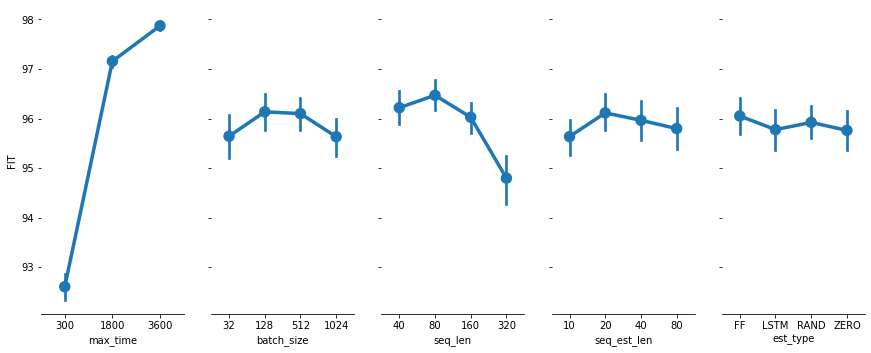

In [42]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

# Biggest effect seems to be max_time

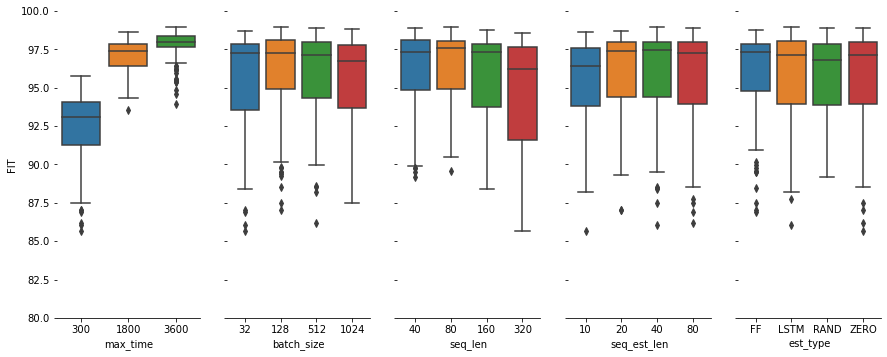

In [43]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(80, 100))
sns.despine(fig=g.fig, left=True)

In [44]:
fig = make_subplots(rows=1, cols=5)
for idx, factor in enumerate(factors):
    aa=fig.add_box(y=df_res["FIT"], x=df_res[factor], row=1, col=idx+1, name=factor)#, label="a") 
    fig.update_yaxes(range=[80, 100], row=1, col=idx+1)
fig.show()

In [34]:
df_short_est = df_res[(df_res["seq_est_len"] == 10)]
df_short_est.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
303,23,0.001,10000,3600,1024,80,10,forward,LSTM,15,352,98.647896,3.233535
695,209,0.001,10000,3600,128,80,10,forward,FF,15,465,98.624115,3.290384
278,218,0.001,10000,3600,32,160,10,forward,FF,15,294,98.614952,3.312312
186,17,0.001,10000,3600,128,80,10,forward,LSTM,15,55,98.603325,3.340106
180,5,0.001,10000,3600,128,40,10,forward,LSTM,15,103,98.602142,3.342936
401,221,0.001,10000,3600,128,160,10,forward,FF,15,367,98.570923,3.417603
362,29,0.001,10000,3600,128,160,10,forward,LSTM,15,496,98.542755,3.484965
717,197,0.001,10000,3600,128,40,10,forward,FF,15,144,98.506874,3.570766
501,208,0.001,10000,1800,128,80,10,forward,FF,15,312,98.417107,3.785452
677,200,0.001,10000,3600,512,40,10,forward,FF,15,609,98.407684,3.807976


In [49]:
df_short_est.tail(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
436,195,0.001,10000,300,128,40,10,forward,FF,15,375,92.260170,18.509602
435,615,0.001,10000,300,128,320,10,forward,RAND,15,598,92.195610,18.663976
263,576,0.001,10000,300,32,40,10,forward,RAND,15,138,92.193344,18.669421
349,234,0.001,10000,300,512,320,10,forward,FF,15,363,92.097786,18.897936
66,201,0.001,10000,300,1024,40,10,forward,FF,15,511,92.038612,19.039446
292,423,0.001,10000,300,128,320,10,forward,ZERO,15,601,91.410172,20.542337
643,612,0.001,10000,300,32,320,10,forward,RAND,15,152,91.170326,21.115934
741,228,0.001,10000,300,32,320,10,forward,FF,15,334,90.951561,21.639099
188,393,0.001,10000,300,1024,40,10,forward,ZERO,15,665,90.898140,21.766851
1,9,0.001,10000,300,1024,40,10,forward,LSTM,15,204,90.859886,21.858344


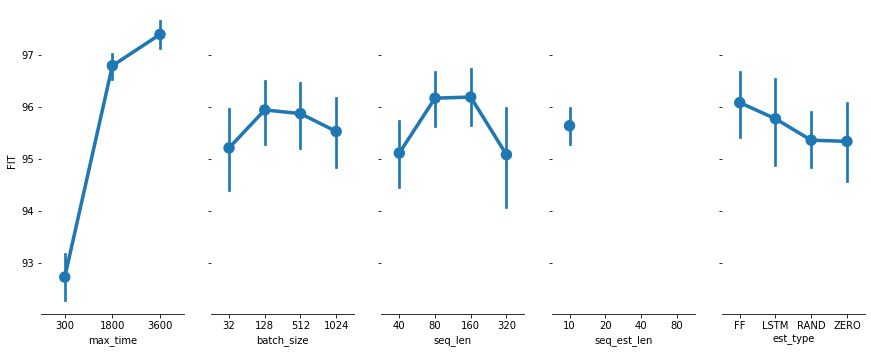

In [50]:
# Full results: main effects
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

# Biggest effect seems to be max_time